<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Oslo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Oslo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [148]:
# importar os pacotes necessarios
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [149]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/norway/oslo/oslo/2020-12-31/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [150]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,1999,3,38,2020-01-13,0.43,1,1
1,69964,Lovely flat in Oslo city centre,175633,Kris,NaN,Sagene,59.93898,10.77360,Entire home/apt,427,28,7,2013-05-18,0.06,1,301
2,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,524,4,50,2020-03-12,0.42,1,365
3,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,2210,7,15,2019-12-28,0.13,1,358
4,92103,Trendy Urban Downtown Oslo.,496205,Dorte,NaN,Grünerløkka,59.91975,10.75466,Entire home/apt,1261,3,20,2013-08-18,0.17,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [151]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Entradas:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 3010
Entradas:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [152]:
# verificando dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               3010
reviews_per_month                  548
last_review                        548
name                                 1
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
id                                   0
dtype: int64

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [153]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  18.205980
last_review                        18.205980
name                                0.033223
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

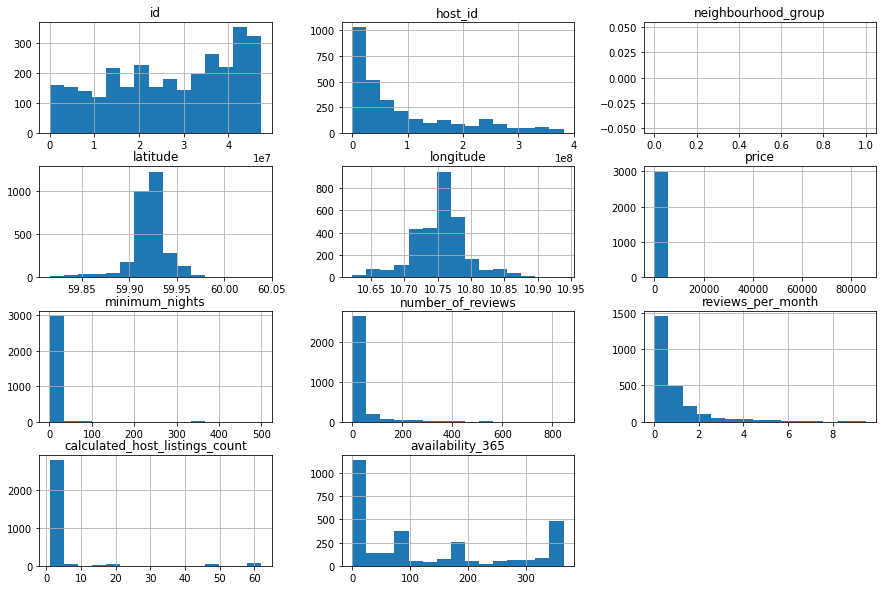

In [154]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**Q4. Qual a média dos preços de aluguel?**

In [155]:
# ver a média da coluna `price``
df.price.mean()

1148.9159468438538

In [156]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000
mean,1148.915947,5.086711,25.840199,3.775415,126.621262
std,2042.174465,18.608474,57.085979,10.573489,136.473223
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,565.250000,2.000000,1.000000,1.000000,0.000000
50%,819.500000,2.000000,6.000000,1.000000,87.000000
75%,1214.000000,4.000000,23.000000,2.000000,237.500000
max,85800.000000,500.000000,844.000000,62.000000,365.000000


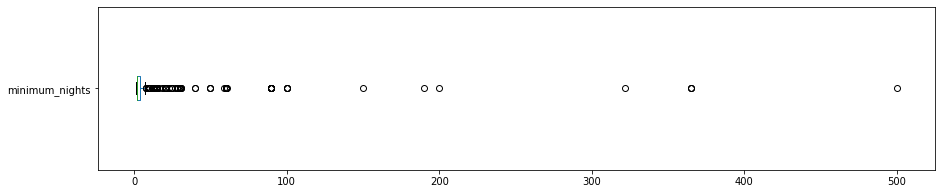

minimum_nights: valores acima de 60:
21 entradas
0.6977%


In [157]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 60 dias para minimum_nights
print("minimum_nights: valores acima de 60:")
print("{} entradas".format(len(df[df.minimum_nights > 60])))
print("{:.4f}%".format((len(df[df.minimum_nights > 60]) / df.shape[0])*100))

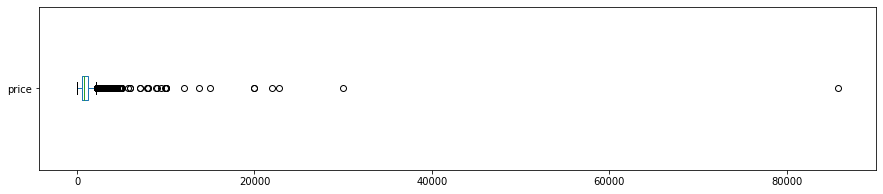


price: valores acima de 2000
271 entradas
9.0033%


In [158]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

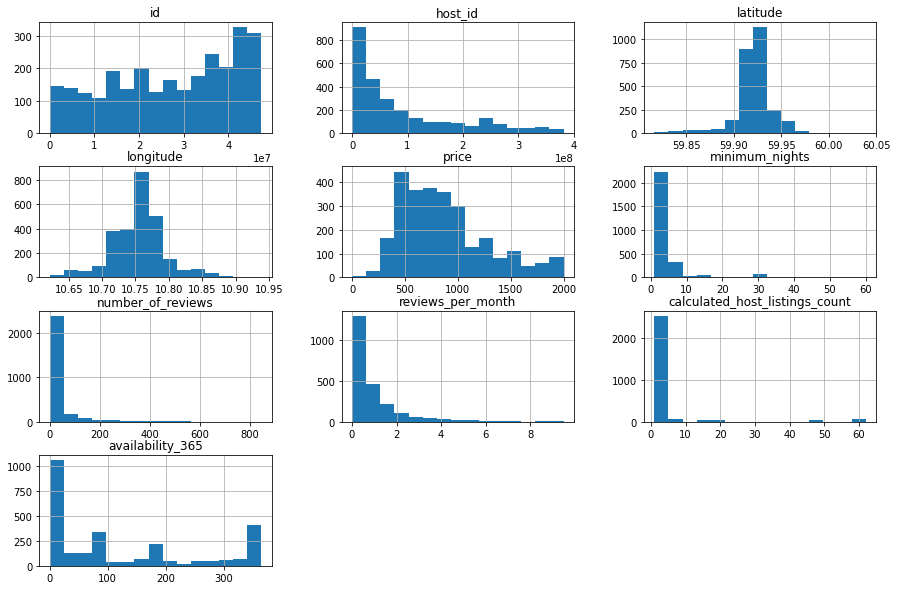

In [159]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace=True)


# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


**Q4. Qual a média dos preços de aluguel após limpar outliers?**

In [160]:
# ver a média da coluna `price``
df_clean.price.mean()

863.8552534900808

### **Q4. Qual a correlação existente entre as variáveis**

In [161]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.069355,-0.131823,-0.159796,-0.049142,0.044089
minimum_nights,-0.069355,1.000000,-0.069165,-0.111110,0.002790,0.017646
number_of_reviews,-0.131823,-0.069165,1.000000,0.831438,-0.044275,0.029749
reviews_per_month,-0.159796,-0.111110,0.831438,1.000000,0.017481,-0.005766
calculated_host_listings_count,-0.049142,0.002790,-0.044275,0.017481,1.000000,0.159615
availability_365,0.044089,0.017646,0.029749,-0.005766,0.159615,1.000000


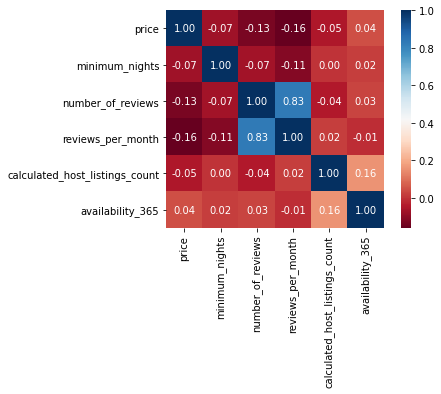

In [162]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [163]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2032
Private room        655
Shared room          27
Hotel room            8
Name: room_type, dtype: int64

In [164]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.746510
Private room       0.240632
Shared room        0.009919
Hotel room         0.002939
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [165]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Stovner           1073.714286
Sentrum            981.646154
Frogner            940.586420
Vestre Aker        907.716049
Nordstrand         907.011111
Marka              905.071429
St. Hanshaugen     873.498471
Gamle Oslo         859.422993
Grünerløkka        853.089965
Ullern             851.291667
Name: price, dtype: float64

In [166]:
# ver quantidade de imóveis em Stovner
print(df_clean[df_clean.neighbourhood == "Stovner"].shape)

# ver quantidade de imóveis em Sentrum            
print(df_clean[df_clean.neighbourhood == "Sentrum"].shape)

# ver quantidade de imóveis em Frogner            
print(df_clean[df_clean.neighbourhood == "Frogner"].shape)

# ver as 7 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Stovner"]

(7, 15)
(65, 15)
(486, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
70,1574090,Glaced balcony-retreat,8366924,Solvor,Stovner,59.96004,10.93330,Private room,367,1,50,2018-06-03,0.61,1,89
799,15970568,"Charming house Høybråten, Oslo",69418258,Lillian,Stovner,59.94350,10.92018,Entire home/apt,660,2,8,2019-08-05,0.18,1,0
954,18993175,"Peaceful, beautiful place, 15 minutes from Oslo",132483168,Iffat,Stovner,59.94688,10.90942,Entire home/apt,2000,1,2,2018-01-25,0.05,1,0
1439,27102358,"Big apartment in a relaxing atmosphere,Near ce...",151558579,Yawar,Stovner,59.95485,10.92960,Entire home/apt,999,1,100,2020-03-31,3.39,1,31
2187,39023798,"En koselig, stille og rolig i sentralt område",288308288,Negash,Stovner,59.95595,10.91644,Entire home/apt,790,5,11,2020-05-30,0.76,1,168
2375,41521463,Familiehus,307879599,Sven,Stovner,59.95363,10.93840,Entire home/apt,2000,2,2,2020-03-07,0.19,1,149
2574,43673503,Praktisk leilighet nær buss og tog.,16787626,Anders,Stovner,59.94514,10.91518,Entire home/apt,700,2,2,2020-12-29,2.00,1,90


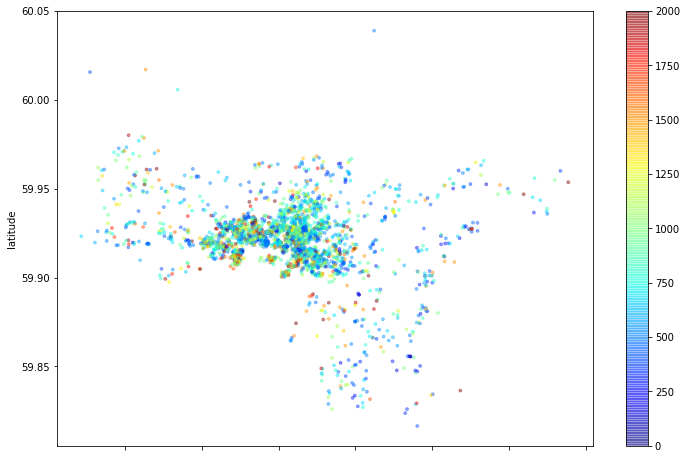

In [167]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [168]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

3.870315944158707

## Conclusões


Após analisar e comparar a cidade de Oslo e a cidade do Rio de Janeiro, foi possivel observar que o dataset de ambas eram parecidos, apesar da cidade de Oslo ter apenas 0,8% do volume de dados, ambas apresentaram outliers no preço e no número minimo de noites, devido ao menor número de amostrar, optei por mudar a faixa de corte para 60 noites e o price para 2000, cortando assim somente 0.7% das entrada devido ao número de noites e 9% das entradas devido ao valor da diaria.



## Adicionando algumas analises da aula **bonus**


In [169]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/norway/oslo/oslo/2020-12-31/visualisations/listings.csv")

In [170]:
# excluindo colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review', 'neighbourhood_group'], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

# apresentar percentual de dados faltantes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

In [171]:
# IQR = Q3 - Q1  => price

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print(IQR_price)

sup_price = q3_price + 1.5 * IQR_price
print(sup_price)


inf_price = q3_price - 1.5 * IQR_price
print(inf_price)

649.0
2187.5
240.5


In [172]:
# IQR = Q3 - Q1  => minimum_nights

q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print(IQR_minimum_nights)

sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
print(sup_minimum_nights)


inf_minimum_nights = q3_minimum_nights - 1.5 * IQR_minimum_nights
print(inf_minimum_nights)

2.0
7.0
1.0


In [180]:
# limpando o dataset

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2187.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price < 240.5].index, axis=0, inplace=True)

df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights < 1].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (3009, 13)
Shape após a limpeza:  (2572, 13)


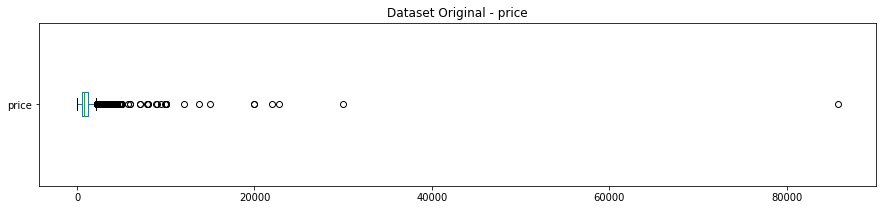

O dataset possui 3009 colunas
230 Entradas acima de 335.5
Representam 7.64% do dataset


In [183]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 335.5".format(len(df[df.price > 2187.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 2187.5]) / df.shape[0])*100))

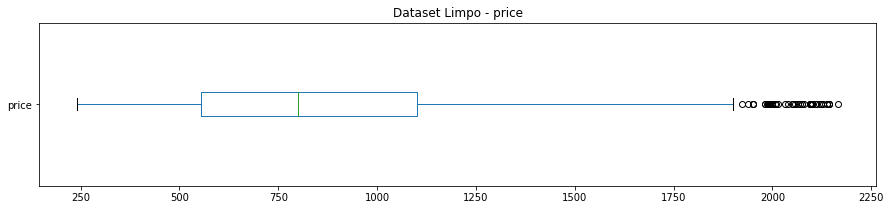

Tamanho original: 3009 colunas
Tamanho atual: 2572 colunas


In [182]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

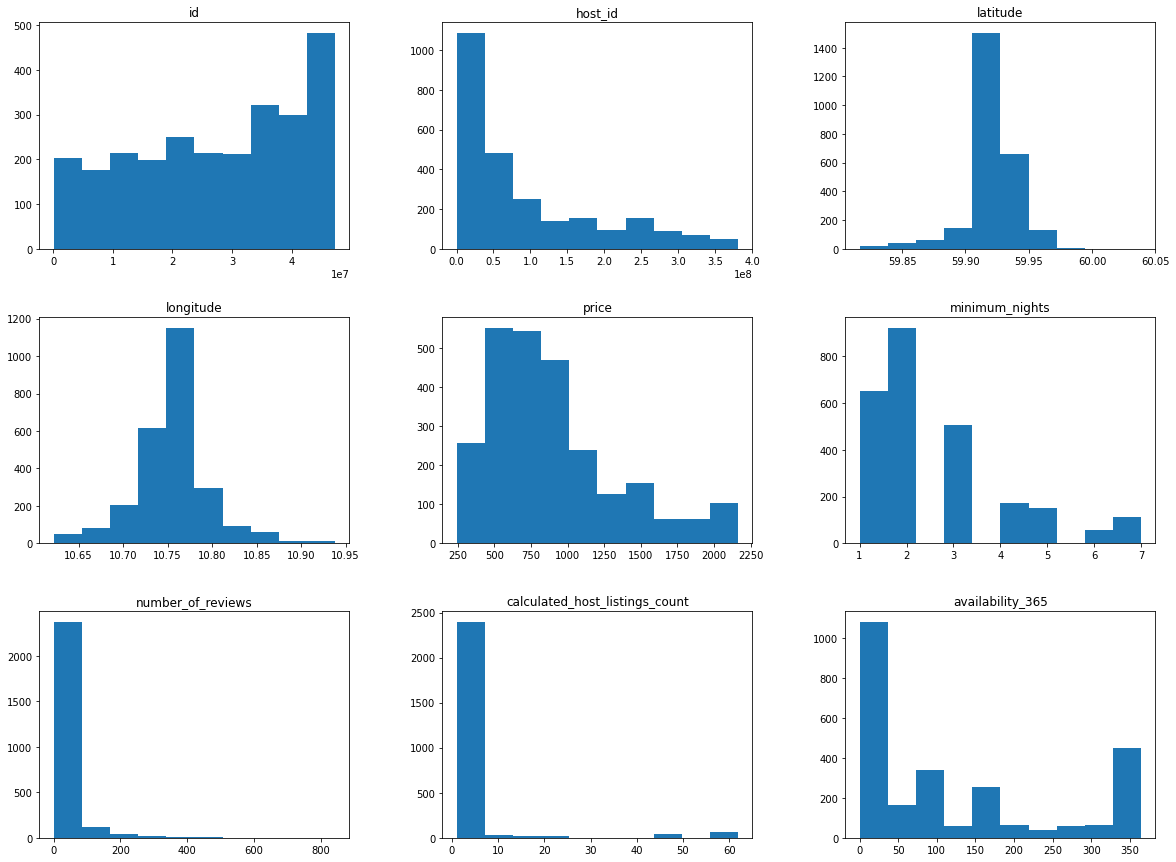

In [184]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

In [185]:
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2572.0,2572.0,2572.0,2572.0,2572.0,2572.0,2572.0,2572.0,2572.0
mean,27300897.4,91292289.6,59.9,10.8,897.7,2.6,27.7,4.0,121.8
std,14023367.5,96502353.3,0.0,0.0,434.0,1.5,60.1,11.3,134.7
min,42932.0,43067.0,59.8,10.6,241.0,1.0,0.0,1.0,0.0
25%,15184144.0,16816711.0,59.9,10.7,555.0,1.0,1.0,1.0,0.0
50%,29269912.0,50576774.0,59.9,10.8,800.0,2.0,7.0,1.0,83.0
75%,40189040.0,141548382.8,59.9,10.8,1100.0,3.0,25.0,1.0,203.0
max,47347872.0,381555587.0,60.0,10.9,2166.0,7.0,844.0,62.0,365.0
